In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
meas_ROUND = pd.read_csv('meas_ROUND.csv', index_col=0)
meas_ROUND_LONG = pd.read_csv('meas_ROUND_LONG.csv', index_col=0)
theor_ROUND = pd.read_csv('theor_df_ROUND.csv', index_col=0)
theor_ROUND_LONG = pd.read_csv('theor_df_ROUND_LONG.csv', index_col=0)

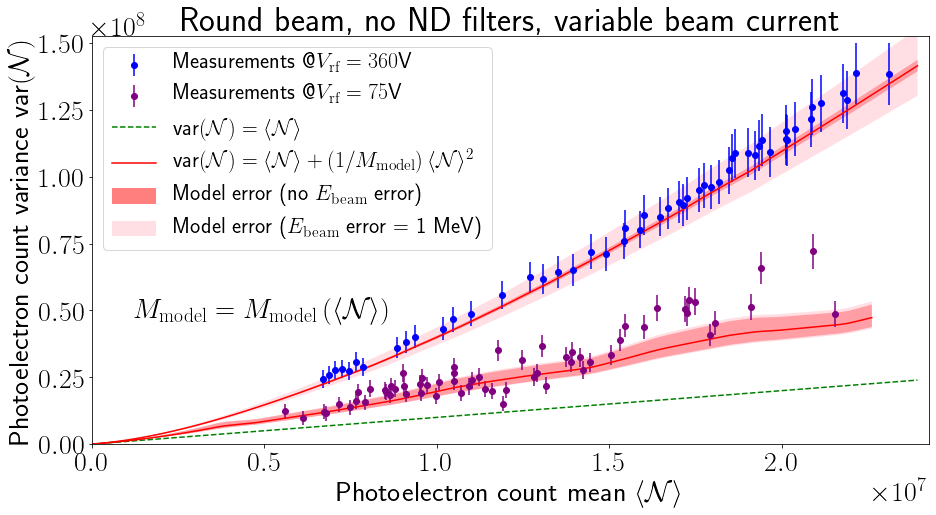

In [18]:
from matplotlib import rc
rc("text", usetex=True)
plt.rcParams.update({'font.size': 28,'legend.fontsize':22})
colors = {"ROUND": 'blue', "ROUNDLONG": 'purple'}

fig, ax = plt.subplots(figsize=(15, 7.5))
ax.errorbar(meas_ROUND['N'],meas_ROUND['varN'],marker='o',linestyle='None',yerr=meas_ROUND['errorbar'],color='b', label = r'Measurements @$V_{\mathrm{rf}}=360$V')
ax.errorbar(meas_ROUND_LONG['N'],meas_ROUND_LONG['varN'],marker='o',linestyle='None',yerr=meas_ROUND_LONG['errorbar'],color='purple', label = r'Measurements @$V_{\mathrm{rf}}=75$V')
ax.plot(theor_ROUND['N'], theor_ROUND['N'],color='green',linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle$")


ax.plot(theor_ROUND['N'], theor_ROUND['varN'], color='red', label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{model}}\right)\langle\mathcal{N}\rangle^2$")
ax.fill_between(
    theor_ROUND['N'],
    theor_ROUND['varN_bottom_no_Ebeam'],
    theor_ROUND['varN_top_no_Ebeam'],
    facecolor='red', alpha=0.5, label='Model error (no $E_{\mathrm{beam}}$ error)')
ax.fill_between(
    theor_ROUND['N'],
    theor_ROUND['varN_bottom_with_Ebeam'],
    theor_ROUND['varN_top_with_Ebeam'],
    facecolor='pink', alpha=0.5, label='Model error ($E_{\mathrm{beam}}$ error = 1 MeV)')

ax.plot(theor_ROUND_LONG['N'], theor_ROUND_LONG['varN'], color='red')
ax.fill_between(
    theor_ROUND_LONG['N'],
    theor_ROUND_LONG['varN_bottom_no_Ebeam'],
    theor_ROUND_LONG['varN_top_no_Ebeam'],
    facecolor='red', alpha=0.5)
ax.fill_between(
    theor_ROUND_LONG['N'],
    theor_ROUND_LONG['varN_bottom_with_Ebeam'],
    theor_ROUND_LONG['varN_top_with_Ebeam'],
    facecolor='pink', alpha=0.5)

ax.set_ylabel(r"Photoelectron count variance var$\left(\mathcal{N}\right)$")
ax.set_xlabel(r"Photoelectron count mean $\langle\mathcal{N}\rangle$")
ax.set_title(r"Round beam, no ND filters, variable beam current")
handles, labels = plt.gca().get_legend_handles_labels()
order = [4,5,0,1,2,3]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.text(0.05,0.55-0.25,r'$M_{\mathrm{model}}=M_{\mathrm{model}}\left(\langle\mathcal{N}\rangle\right)$',transform=ax.transAxes)
ax.set_xlim(0, 1.05*meas_ROUND['N'].max())
ax.set_ylim(0, 1.1*meas_ROUND['varN'].max())
plt.show()